In [1]:
import finesse.virgo
import finesse.analysis.actions as fa
from finesse.virgo.actions import DARM_RF_to_DC

In [2]:
# simple make, can be configured, returns Finesse model
model = finesse.virgo.make_virgo(
    maxtem="off",
    thermal_state="design-matched",
    use_3f_error_signals=False,
    with_apertures=False,
    x_scale=1,
    zero_k00=False,
    display_plots=False,
    verbose=False,
)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
show_progress_bars= False
Switching to DARM DC lock...
show_progress_bars= False
show_progress_bars= False
Done.


In [3]:
# can also make from a modified model
virgo = finesse.virgo.Virgo()
virgo.model.parse("var test 1")
virgo.make()
print('test =', virgo.model.test.value)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
show_progress_bars= False
Switching to DARM DC lock...
show_progress_bars= False
show_progress_bars= False
Done.
test = 1.0


In [4]:
# or make step by step
virgo = finesse.virgo.Virgo()
virgo.model.parse("var state 0")
# virgo.adjust_recycling_cavities()
virgo.adjust_recycling_cavity_length("PRC", "lPRC", "lPOP_BS")
virgo.adjust_recycling_cavity_length("SRC", "lSRC", "lsr")
virgo.pretune() # now in pretuned state

# and modify the model in between
virgo.model.state.value += 1

virgo.apply_dc_offset()
virgo.optimize_demodulation_phase()
virgo.model.run(fa.RunLocks(method="newton"))
virgo.model.state.value += 1

virgo.model.run(DARM_RF_to_DC()) # now in dc locked state
virgo.model.state.value += 1

print('state =', virgo.model.state.value)

show_progress_bars= False
show_progress_bars= False
show_progress_bars= False
state = 3.0


In [5]:
# the model is accessible and can be replaced, but this breaks state
#   meaning configurable settings are potentially wrong
#   and would need to be set manually
virgo = finesse.virgo.Virgo()
virgo.print_thermal_values()

virgo.model = finesse.virgo.make_virgo(thermal_state="cold")
virgo.print_thermal_values()

print(virgo.thermal_state) # should be "cold"
virgo.thermal_state = "cold"

virgo.model.parse("var test 1")
virgo.model.unparse()
virgo.model.mismatches_table()

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
show_progress_bars= False


regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet


Switching to DARM DC lock...
show_progress_bars= False
show_progress_bars= False
Done.
None


regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet


Coupling,Mismatch (x),Mismatch (y)
BS.p1.i -> BS.p2.o,0.0000,0.0000
BS.p2.i -> BS.p1.o,0.0000,0.0000
BS.p2.i -> BS.p4.o,0.0044,0.0044
BS.p3.i -> BS.p4.o,0.0042,0.0042
BS.p4.i -> BS.p3.o,0.0042,0.0042
BS.p4.i -> BS.p2.o,0.0044,0.0044
NI.p1.i -> NI.p2.o,0.0065,0.0065
NI.p1.i -> NI.p1.o,0.0131,0.0131
NI.p2.i -> NI.p1.o,0.0065,0.0065
NIAR.p1.i -> NIAR.p1.o,0.0133,0.0133


/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


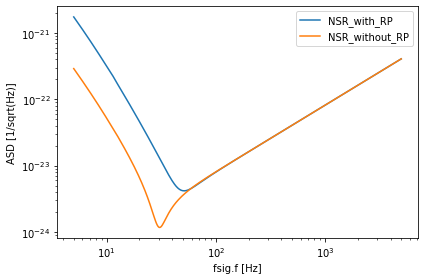

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
show_progress_bars= False
Switching to DARM DC lock...
show_progress_bars= False
show_progress_bars= False
Done.


/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


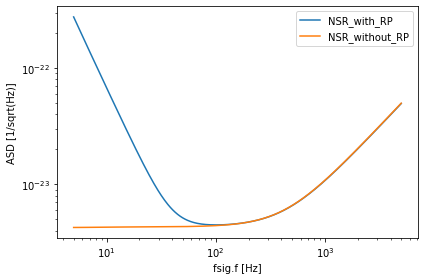

In [6]:
virgo = finesse.virgo.Virgo()
virgo.plot_QNLS()
virgo.make()
virgo.plot_QNLS()

In [8]:
# can be more verbose and display plots
virgo = finesse.virgo.Virgo(verbose=True, display_plots=True)
virgo.make()

Parsing common katfile...
Parsing additional katscript...
Adjusting recycling cavity lengths...
--  adjusting PRC length
    adjusting lPOP_BS.L by 0.0004736 m
--  adjusting SRC length
    adjusting lsr.L by 0.000883 m
Pretuning...
--  dof tunings
    NE_z: 0.0
    WE_z: 0.0
    MICH: -0.0369
    PRCL: 0.05
    SRCL: -87.521
Optimizing demodulation phases...
--  Optimized demodulation phases:
    PRCL     B2_8_I    : phase= -3.4664
    MICH     B2_56_Q   : phase= 26.7843
    CARM     B2_6_I    : phase= -9.6502
    DARM     B1p_56_I  : phase= 41.7514
    SRCL     B2_56_I   : phase=-63.2157
--  Suggested lock gains:
    PRCL     B2_8_I    :   0.015689
    MICH     B2_56_Q   : -0.00050727
    CARM     B2_6_I    :      6.198
    DARM     B1p_56_I  :     151.85
    SRCL     B2_56_I   : 0.00026104
Optimizing lock gains...
--  Optimized lock gains:
    PRCL     B2_8_I    :    -63.741
    MICH     B2_56_Q   :     1971.3
    CARM     B2_6_I    :   -0.16134
    DARM     B1p_56_I  : -0.0065856
  

--  dof tunings
    NE_z: 0.0
    WE_z: 0.0
    MICH: -0.0369
    PRCL: 0.05
    SRCL: -87.521
show_progress_bars= False
show_progress_bars= False
show_progress_bars= False


/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jon/miniconda3/envs/f3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


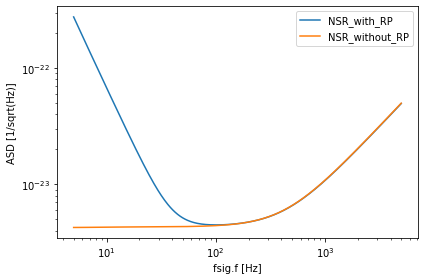

In [12]:
# individual steps can also be made verbose
# TODO: can improve verbosity
virgo = finesse.virgo.Virgo()

# adjust the recycling cavity lengths
virgo.adjust_PRC_length()
virgo.adjust_SRC_length()

# pretune by maximizing cavity power and minimizing dark fringe
virgo.pretune(verbose=True) # now in pretuned state

# prepare to run the locks
virgo.optimize_demodulation_phase()
virgo.optimize_lock_gains()

# run the locks
virgo.model.run(fa.RunLocks(method="newton")) # now in rf locked state

# switch DARM to a DC lock with offset
virgo.model.run(DARM_RF_to_DC()) # now in dc locked state

virgo.plot_QNLS()

In [13]:
# similar to a Finesse model, Virgo can also be deepcopied for branching purposes.
virgo1 = finesse.virgo.Virgo()
virgo1.model.parse('var test 0')

virgo2 = virgo1.deepcopy()
virgo2.model.test.value = 1

print('virgo1.test =', virgo1.model.get('test').value)
print('virgo2.test =', virgo2.model.get('test').value)

virgo1.test = 0.0
virgo2.test = 1.0
